In [38]:
import pandas as pd
import lstm
import time
import numpy as np

forloop_start_time = time.time()

Filename = '2330.csv'
ColumnList = ['成交股數', '成交金額', '成交筆數', '開盤價', '最後揭示買價', '最後揭示賣價', '收盤價']
WindowSize = 50
NumOfPredictDay = 7

#載入資料
DataSet = lstm.LoadData(Filename, ColumnList, WindowSize, NumOfPredictDay)
#正規化資料
NormalizeData = lstm.NormaliseWindows(DataSet)
#切割資料
#x_train, y_train, x_test, y_test = lstm.SplitData(NormalizeData, ColumnList, NumOfPredictDay)
#sequence_length = WindowSize + NumOfPredictDay

#切割訓練資料
x_train, y_train = lstm.SplitDatatoTrain(NormalizeData, ColumnList, NumOfPredictDay)
#切割預測資料
x_predict = lstm.SplitDatatoPredict(DataSet, ColumnList, NumOfPredictDay)
original_value = x_predict[0][0][len(ColumnList) - 1]
x_predict = lstm.NormaliseWindows(x_predict)

#
Layer = [len(ColumnList), 50, 100,NumOfPredictDay]
Loss = 'mse'
Optimizer = 'adam'

#建立LSTM模型
model = lstm.build_model(Layer,Loss,Optimizer)

#
BatchSize = 512
Epoch = 10
ValidationSplit = 0.1

#訓練LSTM模型
model.fit(  x_train,
            y_train,
            batch_size=BatchSize,
            nb_epoch=Epoch,
            validation_split=ValidationSplit)
print('Training duration (s) : ',time.time() - forloop_start_time)

(3285, 50, 7)
(3285, 7)
(1, 50, 7)
> Compilation Time :  0.025542259216308594
Train on 2956 samples, validate on 329 samples
Epoch 1/10
2956/2956 [==============================] - 5s - loss: 0.0095 - val_loss: 0.0061
Epoch 2/10
2956/2956 [==============================] - 4s - loss: 0.0052 - val_loss: 0.0028
Epoch 3/10
2956/2956 [==============================] - 3s - loss: 0.0033 - val_loss: 0.0018
Epoch 4/10
2956/2956 [==============================] - 3s - loss: 0.0026 - val_loss: 0.0018
Epoch 5/10
2956/2956 [==============================] - 4s - loss: 0.0024 - val_loss: 0.0016
Epoch 6/10
2956/2956 [==============================] - 4s - loss: 0.0022 - val_loss: 0.0015
Epoch 7/10
2956/2956 [==============================] - 4s - loss: 0.0021 - val_loss: 0.0015
Epoch 8/10
2956/2956 [==============================] - 3s - loss: 0.0020 - val_loss: 0.0014
Epoch 9/10
2956/2956 [==============================] - 4s - loss: 0.0020 - val_loss: 0.0014
Epoch 10/10
2956/2956 [===============

(3284, 50, 7)
(3284, 7)
(1, 50, 7)
(7, 1)


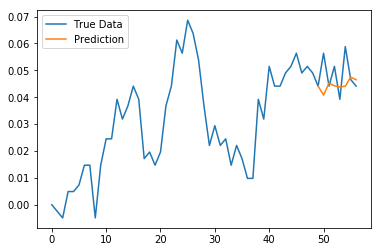

In [39]:
x_train, y_train, x_test, y_test = lstm.SplitDatatoTest(NormalizeData, ColumnList, NumOfPredictDay)
#預測
predictions = lstm.predict_point_by_point(model, x_test)
lstm.plot_predict(predictions, NumOfPredictDay, x_test, y_test)

(3284, 50, 7)
(3284, 7)
(1, 50, 7)
(7, 1)


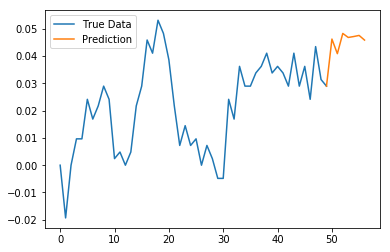

In [40]:
x_train, y_train, x_test, y_test = lstm.SplitDatatoTest(NormalizeData, ColumnList, NumOfPredictDay)
#預測
predictions = lstm.predict_point_by_point(model, x_predict)
#x_predict
lstm.plot_predict(predictions, NumOfPredictDay, x_predict)

In [42]:
ModelInformation = pd.read_pickle("../model/ModelInformation.pickle")
ModelInformation

,FileName,ColumnList,WindowSize,NumOfPredictDay,Layer,Loss,Optimizer,BatchSize,Epoch,ValidationSplit,ModelName
0,2002.csv,"[成交股數, 成交金額, 成交筆數, 開盤價, 最後揭示買價, 最後揭示賣價, 收盤價]",50,3,"[7, 50, 100, 3]",mse,adam,512,10,0.1,0.h5
1,2002.csv,"[成交股數, 成交金額, 成交筆數, 開盤價, 最後揭示買價, 最後揭示賣價, 收盤價]",50,7,"[7, 50, 100, 7]",mse,adam,512,10,0.1,1.h5
2,2002.csv,"[成交股數, 成交金額, 成交筆數, 開盤價, 最後揭示買價, 最後揭示賣價, 收盤價]",50,10,"[7, 50, 100, 10]",mse,adam,512,10,0.1,2.h5
3,2002.csv,"[成交股數, 成交金額, 成交筆數, 開盤價, 最後揭示買價, 最後揭示賣價, 收盤價]",50,30,"[7, 50, 100, 30]",mse,adam,512,10,0.1,3.h5
4,2002.csv,"[成交股數, 成交金額, 成交筆數, 開盤價, 最後揭示買價, 最後揭示賣價, 收盤價]",100,3,"[7, 50, 100, 3]",mse,adam,512,10,0.1,4.h5
5,2002.csv,"[成交股數, 成交金額, 成交筆數, 開盤價, 最後揭示買價, 最後揭示賣價, 收盤價]",100,7,"[7, 50, 100, 7]",mse,adam,512,10,0.1,5.h5
6,2002.csv,"[成交股數, 成交金額, 成交筆數, 開盤價, 最後揭示買價, 最後揭示賣價, 收盤價]",100,10,"[7, 50, 100, 10]",mse,adam,512,10,0.1,6.h5
7,2002.csv,"[成交股數, 成交金額, 成交筆數, 開盤價, 最後揭示買價, 最後揭示賣價, 收盤價]",100,30,"[7, 50, 100, 30]",mse,adam,512,10,0.1,7.h5
8,2317.csv,"[成交股數, 成交金額, 成交筆數, 開盤價, 最後揭示買價, 最後揭示賣價, 收盤價]",50,3,"[7, 50, 100, 3]",mse,adam,512,10,0.1,8.h5
9,2317.csv,"[成交股數, 成交金額, 成交筆數, 開盤價, 最後揭示買價, 最後揭示賣價, 收盤價]",50,7,"[7, 50, 100, 7]",mse,adam,512,10,0.1,9.h5


In [43]:
columns = ModelInformation.columns

In [44]:
import h5py